In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('Wage.csv')

In [4]:
data_x = data['age']
data_y = data['wage']

In [10]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state=1)

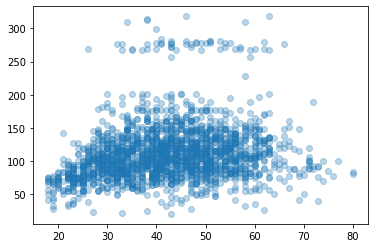

In [11]:
plt.scatter(train_x, train_y, alpha=0.3);

In [12]:
from sklearn.linear_model import LinearRegression

x = train_x.values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, train_y)
print(model.coef_)
print(model.intercept_)

[0.72190831]
80.65287740759283


In [16]:
valid_x = valid_x.reshape(-1, 1)
pred = model.predict(valid_x)

In [18]:
xp = np.linspace(valid_x.min(), valid_x.max(), 70)
xp = xp.reshape(-1,1)
pred_plot = model.predict(xp)

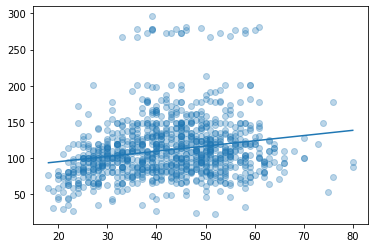

In [21]:
plt.scatter(valid_x, valid_y, alpha=0.3)
plt.plot(xp, pred_plot);

In [22]:
weights = np.polyfit(train_x, train_y, 2)

In [23]:
weights

array([ -0.05194765,   5.22868974, -10.03406116])

In [31]:
model = np.poly1d(weights)

In [32]:
print(model)

          2
-0.05195 x + 5.229 x - 10.03


In [33]:
pred = model(valid_x)
xp = np.linspace(valid_x.min(), valid_x.max(), 70)
pred_plot = model(xp)

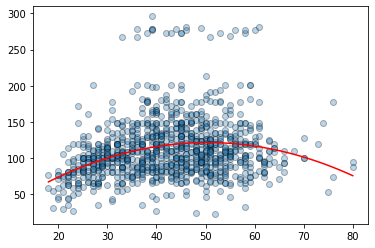

In [36]:
plt.scatter(valid_x, valid_y, edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot, c='r');

In [37]:
df_cut, bins = pd.cut(train_x, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]    504
(33.5, 49.0]      941
(49.0, 64.5]      511
(64.5, 80.0]       54
Name: age, dtype: int64

### Splines

In [53]:
transformed_x = dmatrix("bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)",
                        {"train": train_x},
                        return_type='dataframe')

In [54]:
transformed_x

,Intercept,"bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[0]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[1]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[2]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[3]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[4]","bs(train, knots=(25, 40, 60), degree=3, include_intercept=False)[5]"
1382,1.0,0.000000,0.045272,0.536725,0.395222,0.022781,0.000000
23,1.0,0.000000,0.272109,0.611008,0.116883,0.000000,0.000000
2140,1.0,0.000000,0.004252,0.341933,0.548346,0.105469,0.000000
1117,1.0,0.070523,0.598567,0.319030,0.011879,0.000000,0.000000
933,1.0,0.000000,0.198367,0.632152,0.169231,0.000250,0.000000
...,...,...,...,...,...,...,...
2763,1.0,0.000000,0.139320,0.628472,0.230208,0.002000,0.000000
905,1.0,0.000000,0.045272,0.536725,0.395222,0.022781,0.000000
1096,1.0,0.000000,0.000000,0.155886,0.554832,0.289156,0.000125
235,1.0,0.029752,0.535344,0.409657,0.025247,0.000000,0.000000


In [55]:
fit1 = sm.GLM(train_y, transformed_x).fit()

In [58]:
transformed_x2 = dmatrix('bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)',
                        {'train': train_x},
                        return_type='dataframe')

In [59]:
transformed_x2

,Intercept,"bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[0]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[1]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[2]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[3]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[4]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[5]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[6]"
1382,1.0,0.000000,0.000125,0.272675,0.654300,0.072900,0.000000,0.0
23,1.0,0.000000,0.125000,0.650000,0.225000,0.000000,0.000000,0.0
2140,1.0,0.000000,0.000000,0.066667,0.623611,0.300463,0.009259,0.0
1117,1.0,0.070523,0.503325,0.403285,0.022867,0.000000,0.000000,0.0
933,1.0,0.000000,0.064000,0.610600,0.324600,0.000800,0.000000,0.0
...,...,...,...,...,...,...,...,...
2763,1.0,0.000000,0.027000,0.532800,0.433800,0.006400,0.000000,0.0
905,1.0,0.000000,0.000125,0.272675,0.654300,0.072900,0.000000,0.0
1096,1.0,0.000000,0.000000,0.004267,0.365411,0.531730,0.098593,0.0
235,1.0,0.029752,0.416793,0.504855,0.048600,0.000000,0.000000,0.0


In [60]:
fit2 = sm.GLM(train_y, transformed_x2).fit()

In [63]:
pred1 = fit1.predict(dmatrix('bs(valid, knots=(25, 40, 60), degree=3, include_intercept=False)',
                            {'valid': valid_x},
                             return_type='dataframe'))
pred2 = fit2.predict(dmatrix('bs(valid, knots=(25, 40, 50, 65), degree=3, include_intercept=False)',
                            {'valid': valid_x},
                             return_type='dataframe'))

In [65]:
rms1 = np.sqrt(mean_squared_error(valid_y, pred1))
print(rms1)
rms2 = np.sqrt(mean_squared_error(valid_y, pred2))
print(rms2)

39.40318768341125
39.34292609147627


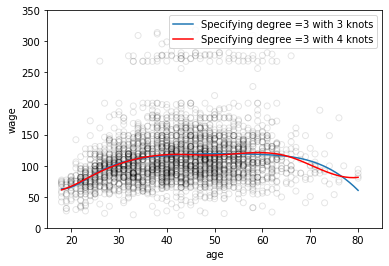

In [66]:
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp": xp}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# Plot the splines
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Specifying degree =3 with 3 knots')
plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()